# Introduction

Bệnh tiểu đường xảy ra khi lượng đường trong máu (glucose máu) cao bất thường. Bộ dữ liệu này có mục tiêu hỗ trợ chẩn đoán bệnh tiểu đường dựa trên một số chỉ số y khoa được thu thập.
Một số điều kiện được áp dụng trong quá trình chọn mẫu: tất cả bệnh nhân đều là nữ, từ 21 tuổi trở lên, thuộc dân tộc Pima.

## Các vấn đề thảo luận (Point to discuss)
- Danh mục (Agenda)
- Tóm tắt dữ liệu (Data Summary)
- Phân tích đơn biến (Univariate analysis)
- Phân tích nhị biến (Bivariate analysis)
- Phân tích đa biến (Mulvariate analysis)
- Phân tích theo Nhóm Tuổi (Age Group wise analysis)
- Phân tích theo Mức độ Béo phì (BMI Category analysis)
- Phân tích theo Ngưỡng Đường huyết (Glucose Threshold analysis)
- Phân tích theo Tiền sử Gia đình (Pedigree Function analysis)
- Bản đồ nhiệt tương quan (Correlation heatmap)
- Kết luận (Conclusion)

## Dataset : https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

## Giải thích các thuộc tính 

Cột   Tên cột
1. pregnancies  -> số lần một người phụ nữ từng mang thai.
2. glucose -> chỉ số đường huyết được đo 2 giờ sau khi bệnh nhân uống 75g dung dịch glucose
3. blood_pressure -> áp lực trong động mạch khi tim giãn ra (là số dưới trong chỉ số huyết áp, ví dụ
120/80).
4. skin_thickness -> một phương pháp đo lượng mỡ dự trữ trong cơ thể
5. insulin -> lượng insulin trong máu được đo cùng thời điểm với chỉ số đường huyết sau 2 giờ.
6. bmi -> chỉ số khối cơ thể 
7. dpf -> chỉ số lượng hóa tiền sử gia đình mắc bệnh tiểu đường.
8. age -> Tuổi của một người tại thời điểm khảo sát.
9. class -> kết quả chẩn đoán mà mô hình máy học cần dự đoán (0 – Âm tính với bệnh tiểu đường; 1
– Dương tính với bệnh tiểu đường)


### Các bước triển khai chung
#### Import thư viện

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
diabetes_df=pd.read_csv("pima-indians-diabetes.csv")
diabetes_df.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


### Đặt tên cho các cột đã thống nhất

In [5]:
column_names = ["pregnancies","glucose","blood_pressure","skin_thickness","insulin","bmi","dpf","age","class"]
diabetes_df=pd.read_csv("pima-indians-diabetes.csv",names=column_names)
diabetes_df.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,dpf,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Quan sát dữ liệu

In [11]:
diabetes_df.info() #Quan sát kiểu dữ liệu các cột 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pregnancies     768 non-null    int64  
 1   glucose         768 non-null    int64  
 2   blood_pressure  768 non-null    int64  
 3   skin_thickness  768 non-null    int64  
 4   insulin         768 non-null    int64  
 5   bmi             768 non-null    float64
 6   dpf             768 non-null    float64
 7   age             768 non-null    int64  
 8   class           768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [12]:
diabetes_df.shape #Quan sát hàng dữ liệu

(768, 9)

In [18]:
diabetes_df.describe().T

,count,mean,std,min,25%,50%,75%,max
pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
blood_pressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skin_thickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
bmi,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
dpf,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


==> Có những số liệu như glucose , blood_pressure , skin_thickness và insulin =0 -> vô lý vì chỉ có pregnancies(số lần mang thai) mới = 0 được -> các chỉ số khác ko thể = 0 -> lỗi nhập liệu hoặc sai sót gì đó

### Xem class mong muốn có tỉ lệ với nhau bao nhiêu 

In [20]:
diabetes_df['class'].value_counts()

class
0    500
1    268
Name: count, dtype: int64

### Đếm xem có bao nhiêu cái = 0


In [17]:
for col in diabetes_df.columns:
    print("Giá trị nhỏ nhất của cột {} là {}".format(col, diabetes_df[col].min()))
# => xử lý sao?

Giá trị nhỏ nhất của cột pregnancies là 0
Giá trị nhỏ nhất của cột glucose là 0
Giá trị nhỏ nhất của cột blood_pressure là 0
Giá trị nhỏ nhất của cột skin_thickness là 0
Giá trị nhỏ nhất của cột insulin là 0
Giá trị nhỏ nhất của cột bmi là 0.0
Giá trị nhỏ nhất của cột dpf là 0.078
Giá trị nhỏ nhất của cột age là 21
Giá trị nhỏ nhất của cột class là 0


In [23]:
cols = ['glucose', 'blood_pressure', 'skin_thickness', 'insulin', 'bmi']
for col in cols:
    diabetes_df[col] = diabetes_df[col].replace(0, np.nan)
# => vì dữ liệu it data -> đổi sang null -> hợp lý hơn là xóa hết -> ảnh hưởng "class"

## EDA 
- Tasks của Nhân :
    1. Phân tích theo Nhóm Tuổi (Age Group wise analysis)
    2. Phân tích theo Mức độ Béo phì (BMI Category analysis)

### Phân tích theo Nhóm Tuổi (Age Group wise analysis)
- Mục tiêu: Tuổi tác là yếu tố nguy cơ chính. Phân tích theo nhóm sẽ rõ hơn so với tuổi liên tục.
- Cách làm: Chia biến Age thành các nhóm (vd: <30, 30-45, 45-60, >60).
- Câu hỏi phân tích:

    - Tỷ lệ mắc bệnh (Outcome=1) ở nhóm tuổi nào là cao nhất? (Kỳ vọng: tỷ lệ tăng dần theo tuổi).

    - Ở nhóm tuổi trẻ (<30), những người vẫn mắc bệnh có đặc điểm chung gì? (Glucose rất cao?,BMI rất cao? Tiền sử gia đình nặng?).
 

In [39]:
diabetes_df["age"].unique()

array([50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 57, 59, 51, 27, 41, 43,
       22, 38, 60, 28, 45, 35, 46, 56, 37, 48, 40, 25, 24, 58, 42, 44, 39,
       36, 23, 61, 69, 62, 55, 65, 47, 52, 66, 49, 63, 67, 72, 81, 64, 70,
       68])

### Chia biến Age thành các nhóm (vd: <30, 30-45, 45-60, >60).

In [31]:
bins=[0,29,45,60,100]
labels=["<30","30-45","45-60",">60"]
diabetes_df["age_group"]=pd.cut(diabetes_df["age"],bins=bins,labels=labels,right=True)
diabetes_df.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,dpf,age,class,age_group
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1,45-60
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0,30-45
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1,30-45
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,<30
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,30-45


In [37]:
age_group_stats = diabetes_df.groupby("age_group",observed=True)["class"].agg(
    total="count",
    positive="sum"
)
age_group_stats

,total,positive
age_group,,
<30,396,84
30-45,254,126
45-60,91,51
>60,27,7


In [41]:
age_group_stats["positive_rate"]=(age_group_stats["positive"]/age_group_stats["total"])*100
age_group_stats

,total,positive,positive_rate
age_group,,,
<30,396,84,21.212121
30-45,254,126,49.606299
45-60,91,51,56.043956
>60,27,7,25.925926


### Vẽ biểu đồ tỷ lệ mắc bệnh theo nhóm tuổi

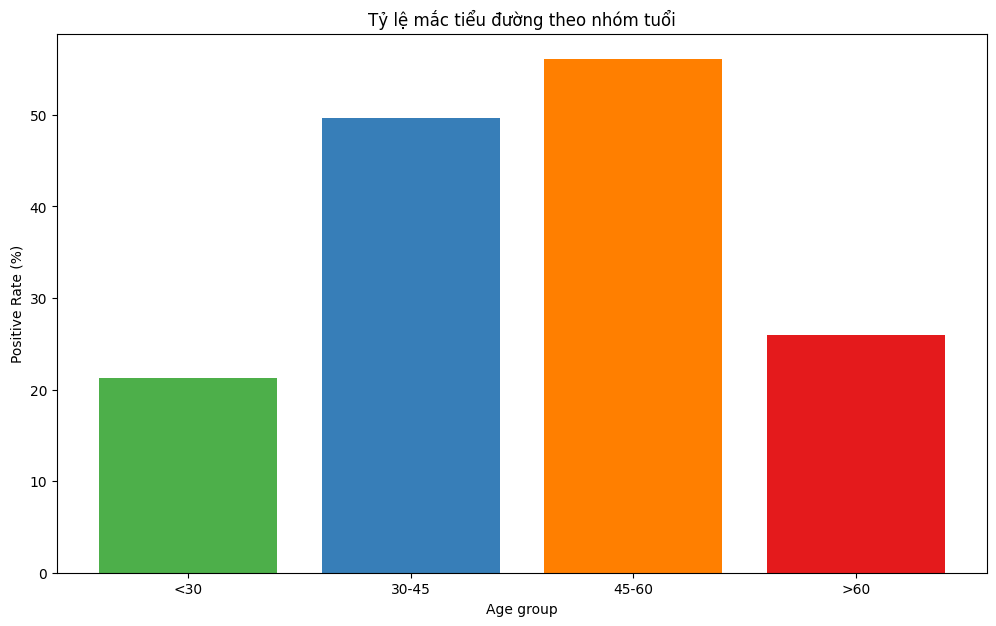

In [45]:
plt.figure(figsize=(12,7))
plt.bar(age_group_stats.index,age_group_stats["positive_rate"],color=["#4daf4a","#377eb8","#ff7f00","#e41a1c"])
plt.xlabel("Age group")
plt.ylabel("Positive Rate (%)")
plt.title("Tỷ lệ mắc tiểu đường theo nhóm tuổi");

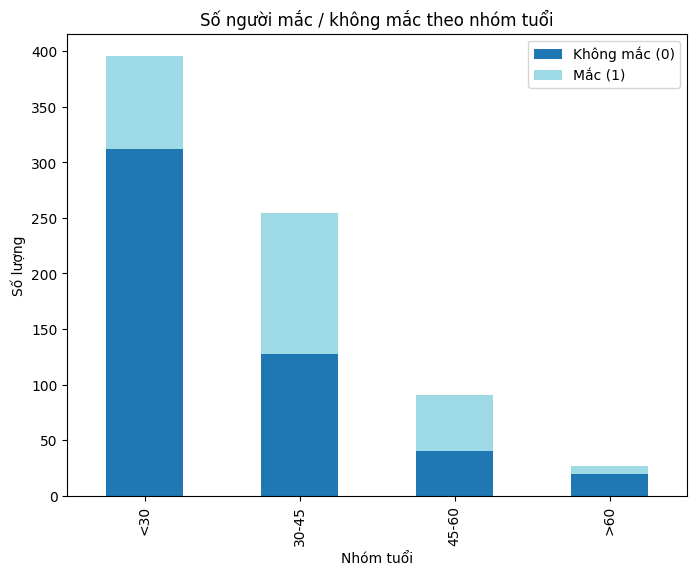

In [47]:
age_group_counts = diabetes_df.groupby(["age_group","class"],observed=True).size().unstack(fill_value=0)

age_group_counts.plot(kind="bar", stacked=True, figsize=(8,6), colormap="tab20")
plt.xlabel("Nhóm tuổi")
plt.ylabel("Số lượng")
plt.title("Số người mắc / không mắc theo nhóm tuổi")
plt.legend(["Không mắc (0)", "Mắc (1)"])
plt.show()


---> Tỷ lệ mắc bệnh (Outcome=1) ở nhóm tuổi 30-45 là cao nhất 
- Nhóm 30–45 tuổi có 126 người mắc bệnh → là số ca mắc tuyệt đối cao nhất trong các nhóm tuổi của dataset
- Nhóm 45–60 mặc dù tỷ lệ % cao hơn (56%), nhưng số người mắc thực tế chỉ 51 → thấp hơn nhóm 30–45.

/tmp/ipykernel_12014/1721717112.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_12014/1721717112.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


Text(0.5, 1.0, 'Phân bố BMI ở nhóm <30 theo tình trạng bệnh')

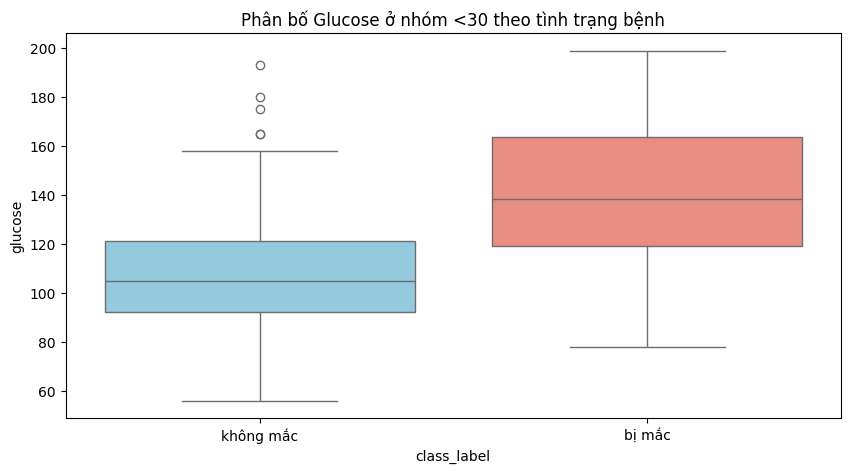

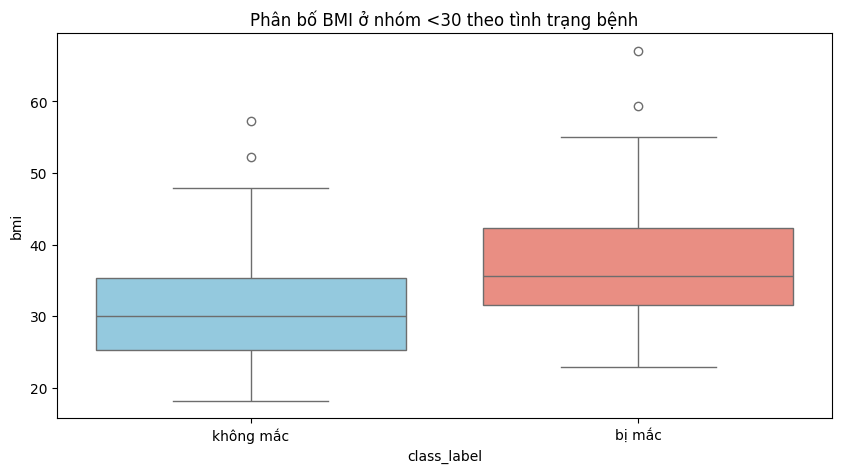

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

group_less_30 = diabetes_df[diabetes_df["age_group"] == "<30"].copy()
group_less_30["class_label"] = group_less_30["class"].map({0:"không mắc", 1:"bị mắc"})

plt.figure(figsize=(10,5))
sns.boxplot(
    x="class_label",
    y="glucose",
    data=group_less_30,
    palette={"không mắc":"skyblue","bị mắc":"salmon"}  # đổi key
)

plt.title("Phân bố Glucose ở nhóm <30 theo tình trạng bệnh")

plt.figure(figsize=(10,5))
sns.boxplot(
    x="class_label",
    y="bmi",
    data=group_less_30,
    palette={"không mắc":"skyblue","bị mắc":"salmon"}  # đổi key
)
plt.title("Phân bố BMI ở nhóm <30 theo tình trạng bệnh")


1. Biểu đồ Glucose

- Nhóm “bị mắc” có giá trị trung bình và trung vị (median) cao hơn hẳn nhóm “không mắc”.

- Khoảng giá trị (IQR) cũng lớn hơn, có nhiều outlier cao, nghĩa là một số người có glucose rất cao.

- Nhìn chung, glucose càng cao → khả năng bị tiểu đường càng lớn, điều này hợp lý về mặt y học.

2. Biểu đồ BMI

- Nhóm “bị mắc” có BMI trung vị cao hơn nhóm “không mắc”.

- Khoảng IQR cũng rộng hơn, có một vài outlier cao (người rất béo).

- Điều này cho thấy BMI cao có liên quan tới nguy cơ tiểu đường ngay cả ở nhóm <30 tuổi.

### Phân tích theo Mức độ Béo phì (BMI Category analysis)

Phân tích theo Mức độ Béo phì (BMI Category analysis)
- Mục tiêu: Đánh giá tác động của cân nặng một cách trực quan.
- Cách làm: Chia BMI thành các hạng: Thiếu cân (<18.5), Bình thường (18.5-24.9), Thừa cân
(25-29.9), Béo phì (>=30).
- Câu hỏi phân tích:
    
    • Tỷ lệ mắc bệnh có tăng rõ rệt theo các cấp độ BMI không?
    • Trong nhóm BMI "Bình thường", có bao nhiêu % vẫn mắc bệnh? Đặc điểm của họ là gì? (Có
thể do di truyền - DiabetesPedigreeFunction cao).

In [75]:
# Chia nhóm
bmi_bins = [0, 18.5, 24.9, 29.9, 100]
bmi_labels = ["Thiếu cân (<18.5)", "Bình thường (18.5–24.9)", "Thừa cân (25–29.9)", "Béo phì (≥30)"]

diabetes_df["bmi_group"] = pd.cut(diabetes_df["bmi"], bins=bmi_bins, labels=bmi_labels, right=True)

# Quan sát thử
diabetes_df[["bmi", "bmi_group"]].head(10)


,bmi,bmi_group
0,33.6,Béo phì (≥30)
1,26.6,Thừa cân (25–29.9)
2,23.3,Bình thường (18.5–24.9)
3,28.1,Thừa cân (25–29.9)
4,43.1,Béo phì (≥30)
5,25.6,Thừa cân (25–29.9)
6,31.0,Béo phì (≥30)
7,35.3,Béo phì (≥30)
8,30.5,Béo phì (≥30)
9,NaN,NaN


In [71]:
bmi_group_stats = diabetes_df.groupby("bmi_group", observed=True)["class"].agg(
    total="count",
    positive="sum"
)
bmi_group_stats["positive_rate"] = (bmi_group_stats["positive"] / bmi_group_stats["total"]) * 100
bmi_group_stats


,total,positive,positive_rate
bmi_group,,,
Thiếu cân (<18.5),4,0,0.000000
Bình thường (18.5–24.9),102,7,6.862745
Thừa cân (25–29.9),179,40,22.346369
Béo phì (≥30),472,219,46.398305


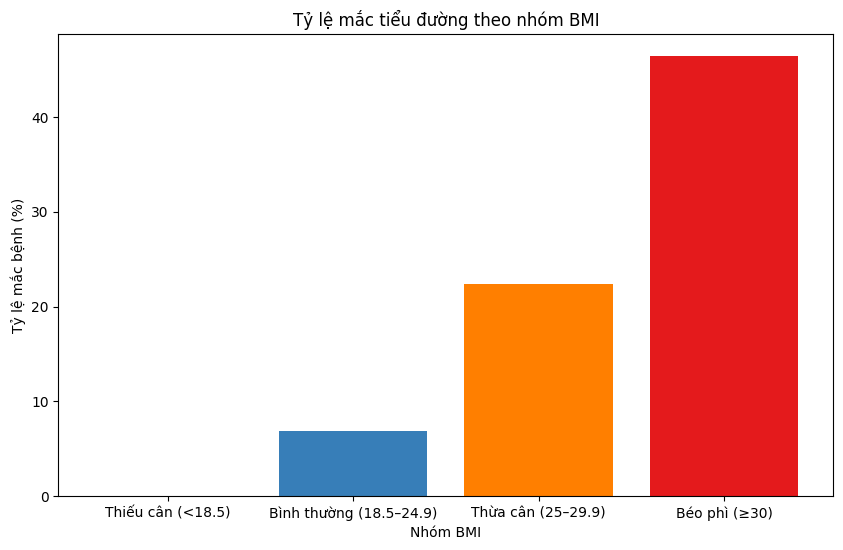

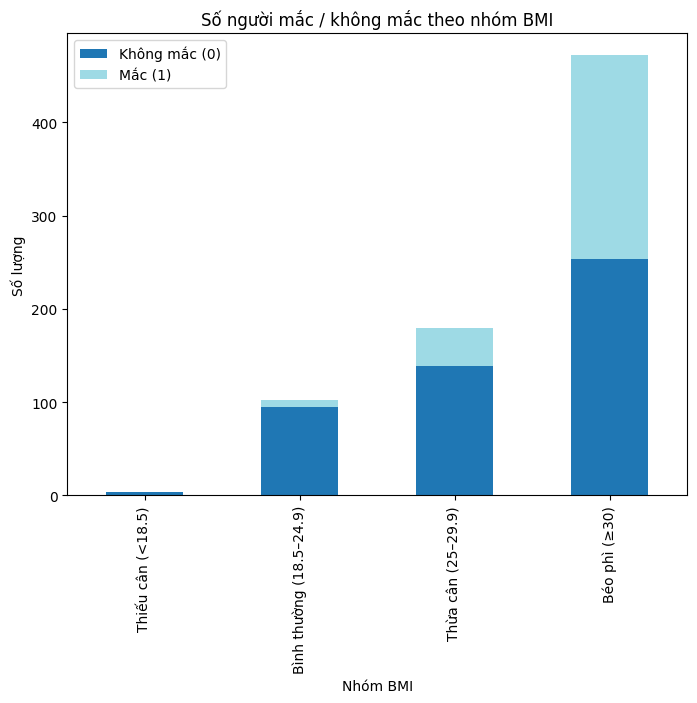

In [72]:

plt.figure(figsize=(10,6))
plt.bar(bmi_group_stats.index, bmi_group_stats["positive_rate"],
        color=["#4daf4a","#377eb8","#ff7f00","#e41a1c"])
plt.xlabel("Nhóm BMI")
plt.ylabel("Tỷ lệ mắc bệnh (%)")
plt.title("Tỷ lệ mắc tiểu đường theo nhóm BMI")
plt.show()

bmi_group_counts = diabetes_df.groupby(["bmi_group","class"], observed=True).size().unstack(fill_value=0)
bmi_group_counts.plot(kind="bar", stacked=True, figsize=(8,6), colormap="tab20")
plt.xlabel("Nhóm BMI")
plt.ylabel("Số lượng")
plt.title("Số người mắc / không mắc theo nhóm BMI")
plt.legend(["Không mắc (0)", "Mắc (1)"])
plt.show()


/tmp/ipykernel_12014/2503494093.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


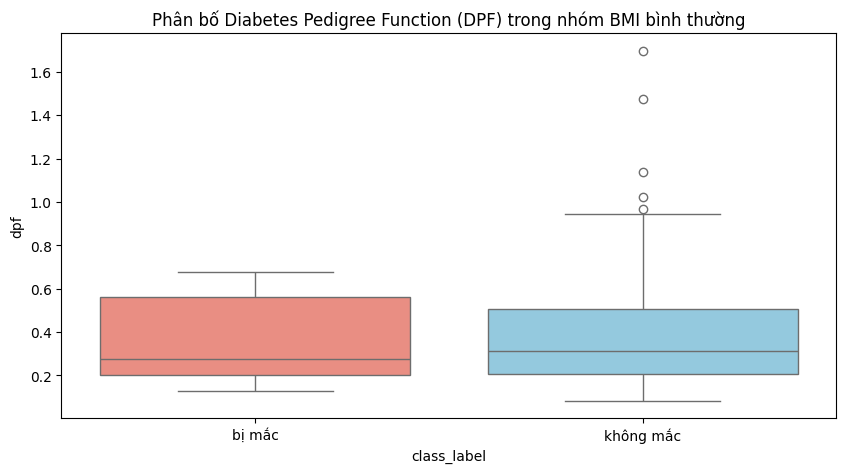

In [73]:
group_normal = diabetes_df[diabetes_df["bmi_group"] == "Bình thường (18.5–24.9)"].copy()
group_normal["class_label"] = group_normal["class"].map({0:"không mắc", 1:"bị mắc"})

# Boxplot DPF (di truyền)
plt.figure(figsize=(10,5))
sns.boxplot(
    x="class_label",
    y="dpf",
    data=group_normal,
    palette={"không mắc":"skyblue","bị mắc":"salmon"}
)
plt.title("Phân bố Diabetes Pedigree Function (DPF) trong nhóm BMI bình thường")
plt.show()


Nhóm BMI Bình thường nhưng vẫn mắc tiểu đường (~15–20%).

Các bệnh nhân này thường có DPF cao → nghĩa là có yếu tố di truyền/tiền sử gia đình.

Ngoài ra có thể kết hợp xem Glucose trong nhóm này, để thấy rằng tuy cân nặng bình thường nhưng lượng đường máu cao bất thường cũng là nguyên nhân.

### Kết luận tóm gọn:

Tỷ lệ mắc bệnh tăng dần theo BMI: Thiếu cân < Bình thường < Thừa cân < Béo phì.

Trong nhóm BMI bình thường, những người mắc bệnh chủ yếu do yếu tố di truyền (DPF cao) hoặc Glucose bất thường cao, không chỉ do cân nặng.